In [ ]:
# -*- coding: utf-8 -*-
# Regression Example With Boston Dataset: Standardized and Wider
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers
from sklearn.utils import shuffle

import pandas as pd
import seaborn as sns
import keras
import keras.utils
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np



,Time,Current,Spin Coating,Increasing PPM,Temperature,Repeat Sensor Use,Days Elapsed,Concentration
0,0,-2.84,0,1,22.0,1,1,0.60
1,0,-2.84,0,1,22.0,1,1,0.70
2,0,-2.84,0,1,22.0,1,1,0.56
3,0,-8.84,0,1,22.0,1,1,1.49
4,0,-10.50,0,1,22.0,1,1,1.63
...,...,...,...,...,...,...,...,...
6523,50,-2.84,1,1,22.0,1,1,6.80
6524,50,-3.65,1,1,22.0,1,1,8.40
6525,50,-4.17,1,1,22.0,1,1,9.70
6526,50,-4.39,1,0,22.0,1,1,8.60


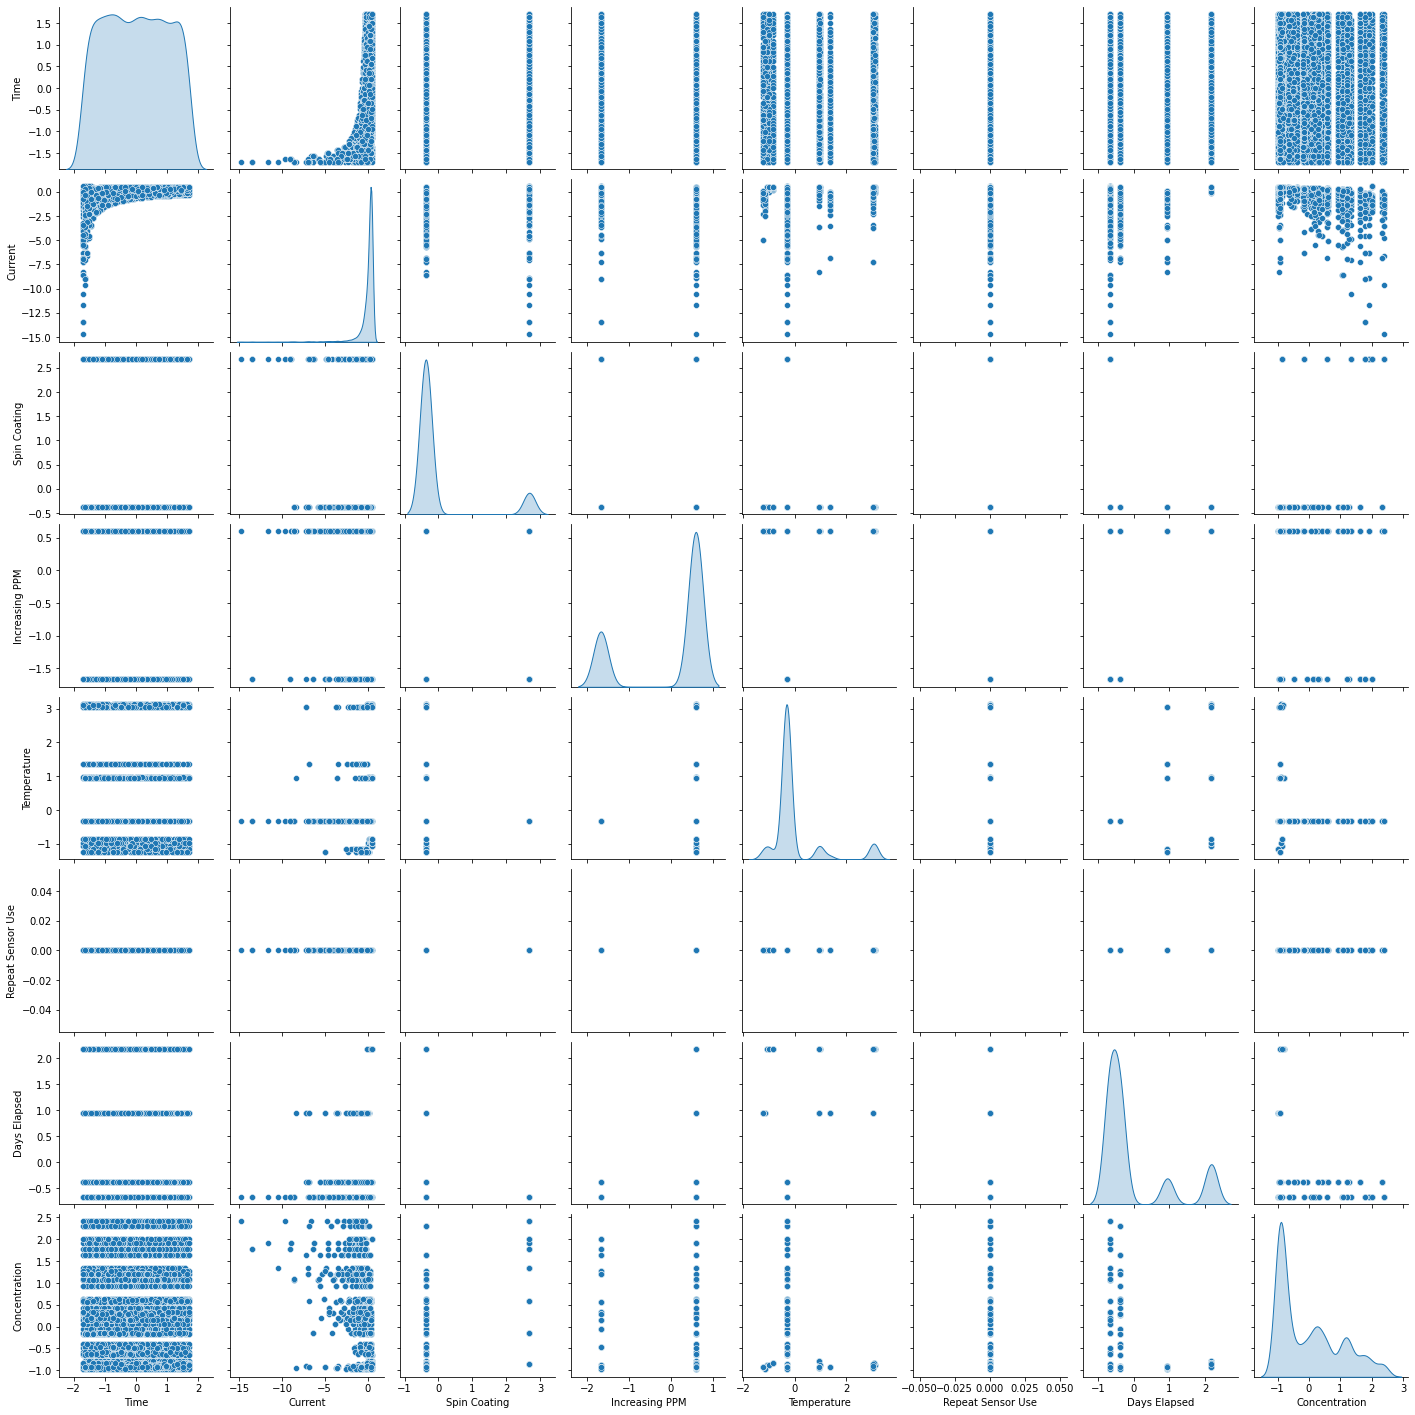

In [88]:
dataset = pd.read_csv('aggregated_data2.csv')

display(dataset)

std_scaler = StandardScaler()
dataset = shuffle(dataset)

train_dataset = dataset.sample(frac=0.8, random_state=3)
train_dataset = std_scaler.fit_transform(train_dataset.to_numpy())
dict = {'Time':train_dataset[:, 0],'Current':train_dataset[:, 1], 'Spin Coating':train_dataset[:, 2] ,'Increasing PPM':train_dataset[:, 3], 'Temperature':train_dataset[:, 4], 'Repeat Sensor Use':train_dataset[:, 5], 'Days Elapsed':train_dataset[:, 6], 'Concentration':train_dataset[:, 7] }
train_dataset = pd.DataFrame(dict)

test_dataset = dataset.drop(train_dataset.index)
test_dataset = std_scaler.transform(test_dataset)
dict2 = {'Time':test_dataset[:, 0],'Current':test_dataset[:, 1], 'Spin Coating':test_dataset[:, 2] ,'Increasing PPM':test_dataset[:, 3], 'Temperature':test_dataset[:, 4], 'Repeat Sensor Use':test_dataset[:, 5], 'Days Elapsed':test_dataset[:, 6], 'Concentration':test_dataset[:, 7] }
test_dataset = pd.DataFrame(dict2)

train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('Concentration')
test_labels = test_features.pop('Concentration')

sns.pairplot(train_dataset[['Time','Current', 'Spin Coating', 'Increasing PPM', 'Temperature', 'Repeat Sensor Use', 'Days Elapsed', 'Concentration']], diag_kind='kde')



In [89]:
def build_model():
  #Experiment with different models, thicknesses, layers, activation functions; Don't limit to only 10 nodes; Measure up to 64 nodes in 2 layers
  model = keras.Sequential([
    layers.Dense(8, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(8, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  #Prepares model for training. Can use an optimizer
  #Change the different
  #model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
  #adam optimizer performs gradient descent
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

  return model

model = build_model()

model.summary()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [90]:

history = model.fit(
    train_dataset, train_labels,
    epochs=30, validation_split=0.2, verbose=1 #, callbacks=early_stop
)

hist = pd.DataFrame(history.history)

hist['epoch']=history.epoch
hist.tail()


Epoch 1/30
131/131 [==============================] - 1s 2ms/step - loss: 0.5449 - mae: 0.5928 - mse: 0.5449 - val_loss: 0.2874 - val_mae: 0.4413 - val_mse: 0.2874
Epoch 2/30
131/131 [==============================] - 0s 1ms/step - loss: 0.1679 - mae: 0.3165 - mse: 0.1679 - val_loss: 0.0834 - val_mae: 0.2141 - val_mse: 0.0834
Epoch 3/30
131/131 [==============================] - 0s 1ms/step - loss: 0.0480 - mae: 0.1512 - mse: 0.0480 - val_loss: 0.0233 - val_mae: 0.1058 - val_mse: 0.0233
Epoch 4/30
131/131 [==============================] - 0s 1ms/step - loss: 0.0154 - mae: 0.0884 - mse: 0.0154 - val_loss: 0.0105 - val_mae: 0.0737 - val_mse: 0.0105
Epoch 5/30
131/131 [==============================] - 0s 1ms/step - loss: 0.0093 - mae: 0.0689 - mse: 0.0093 - val_loss: 0.0084 - val_mae: 0.0631 - val_mse: 0.0084
Epoch 6/30
131/131 [==============================] - 0s 1ms/step - loss: 0.0070 - mae: 0.0600 - mse: 0.0070 - val_loss: 0.0068 - val_mae: 0.0564 - val_mse: 0.0068
Epoch 7/30
131/1

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
25,0.000995,0.022156,0.000995,0.001724,0.029160,0.001724,25
26,0.000900,0.021484,0.000900,0.001183,0.023678,0.001183,26
27,0.000840,0.020711,0.000840,0.000966,0.020830,0.000966,27
28,0.000746,0.019208,0.000746,0.000940,0.021206,0.000940,28
29,0.000687,0.019100,0.000687,0.000785,0.018270,0.000785,29


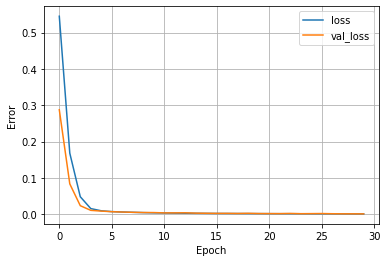

          Time   Current  Spin Coating  Increasing PPM  Temperature  \
0     0.750803  0.442802     -0.373068        0.597847    -0.315254   
1    -0.955508 -0.809235     -0.373068        0.597847     3.052610   
2    -1.433274 -3.478328      2.680476       -1.672668    -0.315254   
3    -0.545993  0.086000     -0.373068       -1.672668    -0.315254   
4     1.296822  0.100767     -0.373068        0.597847    -1.241416   
...        ...       ...           ...             ...          ...   
5217  0.068279  0.130300     -0.373068        0.597847    -0.315254   
5218  1.433327  0.152450      2.680476        0.597847    -0.315254   
5219 -0.341236  0.049083     -0.373068        0.597847    -0.315254   
5220  1.092065  0.314885      2.680476        0.597847    -0.315254   
5221 -1.092012 -0.102276     -0.373068       -1.672668    -0.315254   

      Repeat Sensor Use  Days Elapsed  Concentration  
0                   0.0     -0.665170      -0.636466  
1                   0.0      0.944825

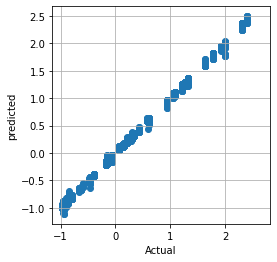

164/164 [==============================] - 0s 976us/step


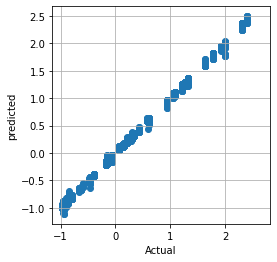

In [93]:

from cgi import test


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()


plot_loss(history)

#test_loss, test_acc = model.evaluate(test_features, test_labels, verbose = 1)

print(train_dataset)
print(test_dataset)
test_predictions = model.predict(test_dataset).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.axis('equal')
plt.axis('square')
plt.grid(True)
plt.show()

train_predictions = model.predict(train_dataset).flatten()
plt.scatter(train_labels,train_predictions)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.axis('equal')
plt.axis('square')
plt.grid(True)
plt.show()



In [ ]:

def plotGraph(y_test,y_pred,regressorName):
    plt.scatter(range(len(test_predictions)), test_labels, color='blue')
    plt.scatter(range(len(test_predictions)), test_predictions, color='red')
    plt.title(regressorName)
    plt.show()
    return



plotGraph(test_labels, test_predictions, "test")



In [45]:
df1 = pd.read_csv('aggregated_data.csv')
a = df1.sample()
display(a)

display(model.predict(a))


,Time,Current,Spin Coating,Increasing PPM,Temperature,Repeat Sensor Use,Days Elapsed,Concentration
28175,30.2,-0.608,0,1,22.0,0,27,3.6


1/1 [==============================] - 0s 84ms/step


array([[3.7647297]], dtype=float32)

In [ ]:
#predictions = model.predict(test_features)

#for i in predictions:
 #   print(i)
 
print(model.to_json())

In [ ]:
from modulefinder import IMPORT_NAME
import os.path
if os.path.isfile('models title.h5') is False:
    model.save('models title.h5')

#Import
from tensorflow.keras.models import load_model
new_model = load_model('models title.h5')

print(new_model.to_json())